In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from sklearn.preprocessing import normalize

In [48]:
def noise_maker(array,start, end, noise, signal_base=1):
    for i in range(start, end):
        array[i]= signal_base+ np.random.normal(scale=noise)
    return array

# Variable signal strength for class, same frequency
def create_signal(size=100, noise=0, number_of_pi=10, label=0):
    pos= round(5 *(size/100))
    
    signal_1= np.zeros(size)
    signal_1= noise_maker(signal_1,0, len(signal_1), noise, 1)
    
    signal_2= np.zeros(size)
    signal_2= noise_maker(signal_2,0, len(signal_2), noise, 1)
    
    signal_0= np.zeros(size)
    signal_0= noise_maker(signal_0,0, len(signal_0), noise, 1)
    
    signal= np.zeros(size)

    if label==0:
        signal_0= noise_maker(signal, pos*5-1, len(signal)-pos*5, noise, 2)
    elif label==1:
        signal_1= noise_maker(signal, pos*5-1, len(signal)-pos*5, noise, 2)
    elif label==2:
        signal_2= noise_maker(signal, pos*5-1, len(signal)-pos*5, noise, 2)
    
    
    return signal_0, signal_1, signal_2

# Exact process of creating dataset 0 and dataset 1 is documented
# in utilities/MultivariateCreateDataset.py



## Dataset0

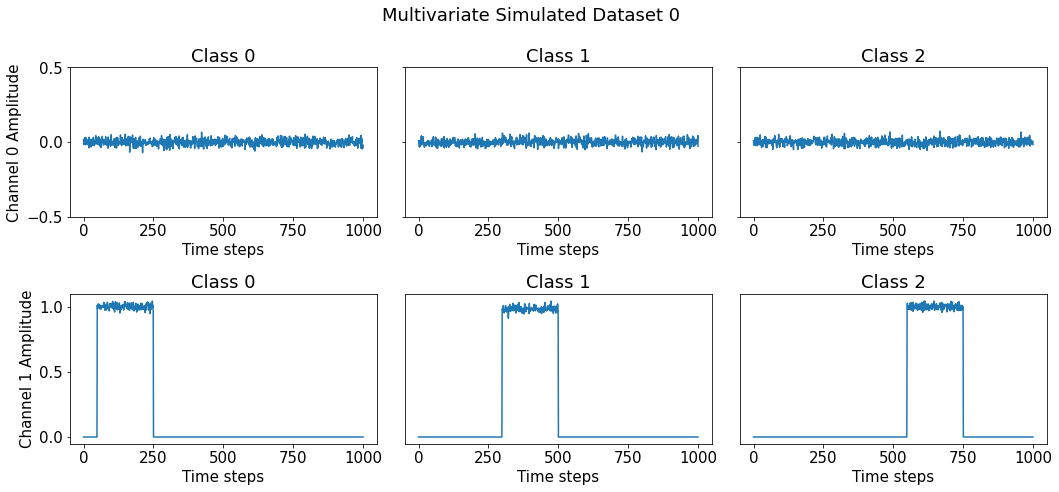

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rc("font", size=15)

default_path= "./experiments/multisimul_study/exp_log0/"
option=1
X,y= pickle.load(open(f"{default_path}dataset{option}.pkl", "rb"))

fig, axes= plt.subplots(2,3)
fig.set_figwidth(15)
fig.set_figheight(7)

indices= np.unique(y, return_index=True)[1]
axis= axes[0][0]
index=indices[0]
class_idx=0

axis.plot(X[index][:,0])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_ylim(-0.5,0.5)
axis.set_yticks([-0.5,0.,0.5])
axis.set_ylabel("Channel 0 Amplitude")
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[1][0]
index=indices[0]
class_idx=0
axis.plot(X[index][:,1])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_ylabel("Channel 1 Amplitude")
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[0][1]
index=indices[1]
class_idx=1

axis.plot(X[index][:,0])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_yticks([])
axis.set_yticks([-0.5,0.,0.5])
axis.set_yticklabels([])
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[1][1]
index=indices[1]
class_idx=1

axis.plot(X[index][:,1])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_yticks([])
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[0][2]
index=indices[2]
class_idx=2

axis.plot(X[index][:,0])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_yticks([-0.5,0.,0.5])
axis.set_yticklabels([])
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[1][2]
index=indices[2]
class_idx=2

axis.plot(X[index][:,1])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_yticks([])
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

plt.suptitle(f"Multivariate Simulated Dataset {option-1}")
plt.tight_layout()


## Weight Profile: Averages

In [3]:
import pickle
from sklearn.preprocessing import MinMaxScaler
ws=[]

original_dict={"DF":"DF", "NFS":"NFS",
               "Weight":"Weight"} #folder: model
model="Weight"
epoch= 50
option=1
runs=5

for model in original_dict.keys():
    ws=[]
    for folder in range(runs):
        scaler= MinMaxScaler()
        w= pickle.load( open(f"./experiments/multisimul_study/exp_log{folder}/{original_dict[model]}/multiseriessimul_study{option}-{model}-w-{epoch}.pkl", "rb") )
        w= scaler.fit_transform(w.reshape(-1,1)).reshape(-1)
        ws.append(w)
        
    if model=="Weight":
        iew_ws= ws.copy()
    elif model=="DF":
        df_ws= ws.copy()
    elif model=="NFS":
        nfs_ws= ws.copy()

Text(0.5, 1.0, 'Weight-Naive: Relative Importance Estimate of Channels')

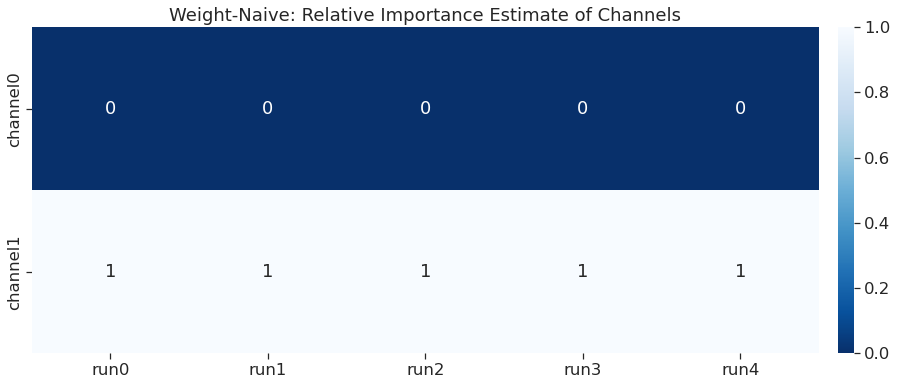

In [4]:
# Overall Relative Importance Estimate of specified Weight profile using Element-wise multplication 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  [f"channel{i}" for i in range(len(w))] 
y_labels= [f"run{i}" for i in range(runs)]
plt.figure(figsize=(17,6))
sns.set(font_scale=1.5)
ax= sns.heatmap(pd.DataFrame(ws).transpose(), 
            xticklabels=y_labels, 
            yticklabels=x_labels, cmap="Blues_r",
            annot=True, cbar_kws={"pad":0.02})

if model=="Weight":
    model="Weight-Naive"
ax.tick_params(left=True, bottom=True)
plt.title(model+": Relative Importance Estimate of Channels")

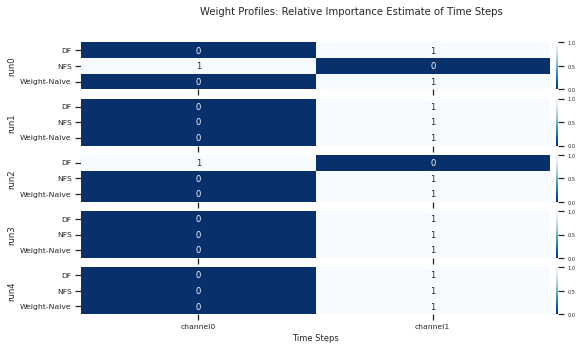

In [30]:
# Overall Relative Importance Estimate of Weight profile methods using Element-wise multplication 
plot_ws=[
    df_ws[0],
    nfs_ws[0],
    iew_ws[0],
    df_ws[1],
    nfs_ws[1],
    iew_ws[1],
    df_ws[2],
    nfs_ws[2],
    iew_ws[2],
    df_ws[3],
    nfs_ws[3],
    iew_ws[3],
    df_ws[4],
    nfs_ws[4],
    iew_ws[4],
]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  [f"channel{i}" for i in range(len(w))] 
y_labels= ["DF", "NFS", "Weight-Naive"]
sns.set(font_scale=0.7)
aspect=15

fig, ax = plt.subplots(5,1)
fig.set_figheight(5)
fig.set_figwidth(10)

start=0
end=start+3
for i in range(4):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
        yticklabels=y_labels,
        annot=True, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )
    ax[i].set_ylabel(f"run{i}")
    ax[i].tick_params(left=True, bottom=True)
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 3
    end += 3

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    xticklabels=x_labels, 
    yticklabels=y_labels, 
    annot=True, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)

ax[-1].set_ylabel("run4")
ax[-1].tick_params(left=True, bottom=True)

ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)

ax[-1].set_xlabel("Time Steps")
if model=="Weight":
    model="Weight-Naive"
fig.suptitle("Weight Profiles: Relative Importance Estimate of Time Steps")

fig.subplots_adjust(wspace=0, hspace=0.2)
# plt.tight_layout()

In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
ws=[]
original_dict={"DF":"DF", "NFS":"NFS",
               "Weight":"Weight"} #folder: model
model="Weight"
epoch= 50
option=1
runs=5

for model in original_dict.keys():
    ws=[]
    for folder in range(runs):
        scaler= MinMaxScaler()
        w= pickle.load( open(f"./experiments/multisimul_study/exp_log{folder}/{original_dict[model]}/multivarsimul_study{option}-{model}-w-{epoch}.pkl", "rb") )
        w= scaler.fit_transform(np.array(w))
        ws.append(w)

    if model=="Weight":
        iew_ts_ws= ws.copy()
    elif model=="DF":
        df_ts_ws= ws.copy()
    elif model=="NFS":
        nfs_ts_ws= ws.copy()

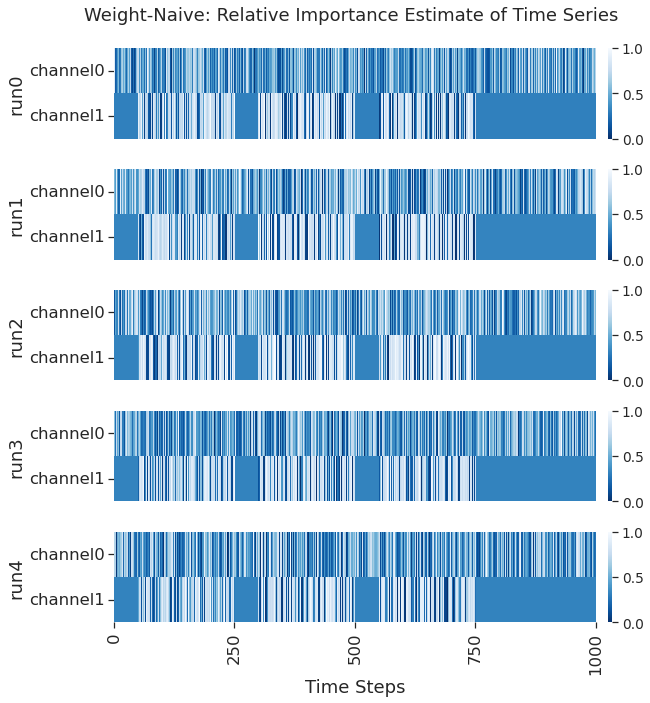

In [6]:
# Relative Importance Estimate of specific Weight profile 
import seaborn as sns
import pandas as pd

fig, ax= plt.subplots(5,1)
sns.set(font_scale=1.25)
for i in range(runs-1):
    sns.heatmap(
        pd.DataFrame(ws[i]).transpose(),
        xticklabels=False,
        yticklabels=[f"channel{c}" for c in range(w.shape[1])],
        annot=False, ax=ax[i], cbar_kws={"pad":0.02}, cmap="Blues_r"
    )
    ax[i].set_ylabel(f"run{i}")
    ax[i].tick_params(left=True, bottom=True)
sns.heatmap(
    pd.DataFrame(ws[-1]).transpose(),
    xticklabels="auto",
    yticklabels=[f"channel{c}" for c in range(w.shape[1])],
    annot=False, ax=ax[-1], cbar_kws={"pad":0.02}, cmap="Blues_r"
)    
ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999]
)
ax[-1].set_xticklabels([0]+[i for i in range(0,1000,250)][1:]+[1000])
ax[-1].tick_params(left=True, bottom=True)

plt.ylabel(f"run{runs-1}")
plt.xlabel("Time Steps")
if model=="Weight":
    model="Weight-Naive"
plt.suptitle(model+": Relative Importance Estimate of Time Series")
fig.set_figwidth(10)
fig.set_figheight(10)
plt.tight_layout()

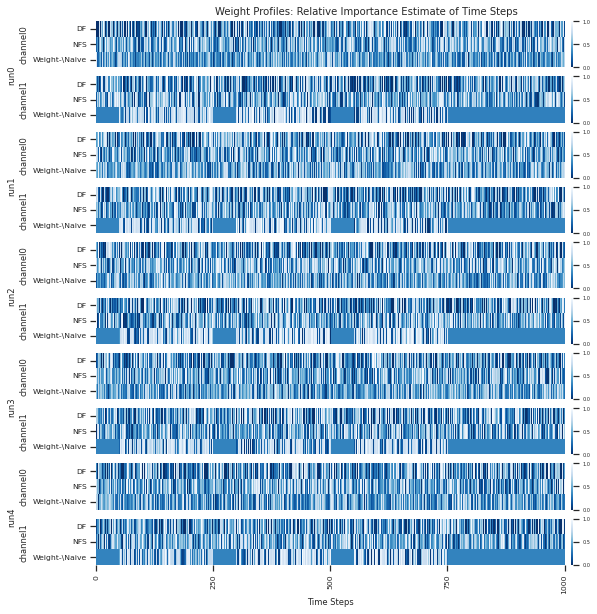

In [80]:
# Overall Relative Importance Estimate of Weight profile methods 
plot_ws=[
    df_ts_ws[0][:,0],
    nfs_ts_ws[0][:,0],
    iew_ts_ws[0][:,0],
    df_ts_ws[0][:,1],
    nfs_ts_ws[0][:,1],
    iew_ts_ws[0][:,1],
    df_ts_ws[1][:,0],
    nfs_ts_ws[1][:,0],
    iew_ts_ws[1][:,0],
    df_ts_ws[1][:,1],
    nfs_ts_ws[1][:,1],
    iew_ts_ws[1][:,1],
    df_ts_ws[2][:,0],
    nfs_ts_ws[2][:,0],
    iew_ts_ws[2][:,0],
    df_ts_ws[2][:,1],
    nfs_ts_ws[2][:,1],
    iew_ts_ws[2][:,1],
    df_ts_ws[3][:,0],
    nfs_ts_ws[3][:,0],
    iew_ts_ws[3][:,0],
    df_ts_ws[3][:,1],
    nfs_ts_ws[3][:,1],
    iew_ts_ws[3][:,1],
    df_ts_ws[4][:,0],
    nfs_ts_ws[4][:,0],
    iew_ts_ws[4][:,0],
    df_ts_ws[4][:,1],
    nfs_ts_ws[4][:,1],
    iew_ts_ws[4][:,1],]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  [f"channel{i}" for i in range(len(w))] 
y_labels= ["DF", "NFS", "Weight-Naive"]
sns.set(font_scale=0.7)
aspect=15

num_plot=10
fig, ax = plt.subplots(num_plot,1)
fig.set_figheight(10)
fig.set_figwidth(10)

start=0
end=start+3
for i in range(num_plot-1):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
        xticklabels=False, #"auto"
        yticklabels=y_labels,
        annot=False, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )
    if i % 2==0:
        ax[i].set_ylabel(f"channel0", rotation=90)
    else:
        ax[i].set_ylabel(f"channel1", rotation=90)
        
    ax[i].tick_params(left=True, bottom=True)
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 3
    end += 3

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    yticklabels=y_labels,
    annot=False, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)
ax[-1].set_ylabel("channel1", rotation=90)
ax[-1].tick_params(left=True, bottom=True)
ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)

ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999]
)
ax[-1].set_xticklabels([0]+[i for i in range(0,1000,250)][1:]+[1000])
ax[-1].set_xlabel("Time Steps")
if model=="Weight":
    model="Weight-Naive"
fig.suptitle("Weight Profiles: Relative Importance Estimate of Time Steps",y=0.9)

fig.subplots_adjust(wspace=0, hspace=0.2)
# plt.tight_layout()

for i in range(5):
    ax[i*2].text(-190,4,f"run{i}", rotation=90)

## Grad Profile: Averages

In [6]:
from utilities.subset_func import return_epoch_stat
import pickle
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

channels= [0,1]
epochs=50
option=1
model="Grad-AUC"
folder_dictionary=[]
runs=5
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multiseriessimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    epoch= return_epoch_stat(grad_all, "sum")
    scaler= MinMaxScaler()
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_auc_gs= pd.DataFrame(folder_dictionary).to_numpy()

[0.29999999 0.39999999 0.59999998 0.79999997]
[0.30000001 0.40000001 0.60000001 0.80000002]
[0.3 0.4 0.6 0.8]
[0.3 0.4 0.6 0.8]
[0.29999999 0.39999999 0.59999999 0.79999998]


In [7]:
from utilities.subset_func import return_epoch_stat
import pickle
from sklearn.preprocessing import MinMaxScaler

channels= [0,1]
epochs=50
option=1
model="Grad-ROC"
folder_dictionary=[]
for folder in range(runs):
    scaler= MinMaxScaler()
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multiseriessimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]    
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_roc_gs= pd.DataFrame(folder_dictionary).to_numpy()

[0.29999999 0.39999999 0.59999998 0.79999997]
[0.29999999 0.39999998 0.59999998 0.79999997]
[0.30000001 0.40000002 0.60000002 0.80000003]
[0.30000001 0.40000001 0.60000002 0.80000003]
[0.30000001 0.40000001 0.60000001 0.80000001]


In [8]:
from utilities.subset_func import return_epoch_stat
import pickle

channels= [0,1]
epochs=50
option=1
model="Grad-STD"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multiseriessimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0] 
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_std_gs= pd.DataFrame(folder_dictionary).to_numpy()

[0.3 0.4 0.6 0.8]
[0.3        0.40000001 0.60000001 0.80000001]
[0.29999998 0.39999998 0.59999996 0.79999995]
[0.3        0.4        0.60000001 0.80000001]
[0.30000001 0.40000002 0.60000003 0.80000003]


Text(0.5, 1.0, 'Grad-STD: Relative Importance Estimate of Channels')

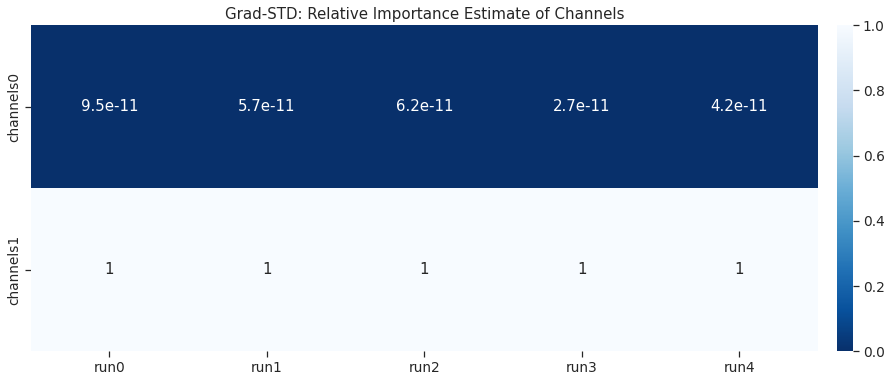

In [9]:
# Relative Importance Estimate of specific gradient profile method using Element wise Multiplication
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,6))
ax= sns.heatmap(
    pd.DataFrame(folder_dictionary).transpose(),
    yticklabels=[f"channels{i}" for i in channels],
    xticklabels=[f"run{i}" for i in range(runs)],
    annot=True, cbar_kws={"pad":0.02}, cmap="Blues_r"
)
ax.tick_params(left=True, bottom=True)
plt.title(model+": Relative Importance Estimate of Channels")

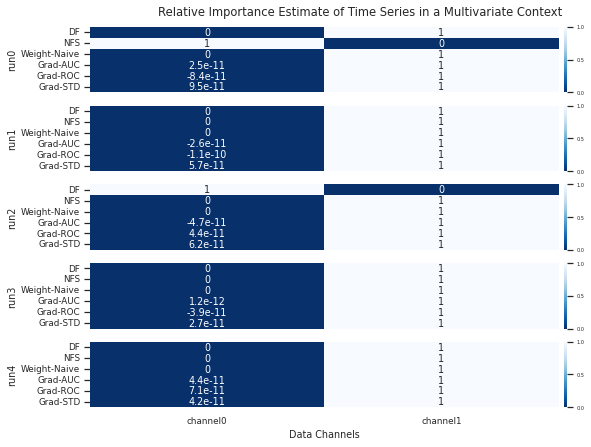

In [9]:
# Overall Relative Importance Estimate of all methods using Element wise Multiplication
plot_ws=[
    df_ws[0],
    nfs_ws[0],
    iew_ws[0],
    grad_auc_gs[0],
    grad_roc_gs[0],
    grad_std_gs[0],
    df_ws[1],
    nfs_ws[1],
    iew_ws[1],
    grad_auc_gs[1],
    grad_roc_gs[1],
    grad_std_gs[1],
    df_ws[2],
    nfs_ws[2],
    iew_ws[2],
    grad_auc_gs[2],
    grad_roc_gs[2],
    grad_std_gs[2],
    df_ws[3],
    nfs_ws[3],
    iew_ws[3],
    grad_auc_gs[3],
    grad_roc_gs[3],
    grad_std_gs[3],
    df_ws[4],
    nfs_ws[4],
    iew_ws[4],
    grad_auc_gs[4],
    grad_roc_gs[4],
    grad_std_gs[4],
]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  ["channel0","channel1"]
y_labels= ["DF", "NFS", "Weight-Naive", "Grad-AUC", "Grad-ROC", "Grad-STD"]#[f"run{i}" for i in range(runs)]
sns.set(font_scale=0.8)
aspect=15

fig, ax = plt.subplots(5,1)
fig.set_figheight(7)
fig.set_figwidth(10)

start=0
end=start+6
for i in range(4):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
        yticklabels=y_labels,
        annot=True, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )
    ax[i].set_xticks([])
    ax[i].set_ylabel(f"run{i}")
    ax[i].tick_params(left=True) 
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 6
    end += 6

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    xticklabels=x_labels, 
    yticklabels=y_labels, 
    annot=True, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)

ax[-1].set_ylabel("run4")
ax[-1].tick_params(left=True) 
ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)

ax[-1].set_xlabel("Data Channels")
if model=="Weight":
    model="Weight-Naive"
fig.suptitle(
    "Relative Importance Estimate of Time Series in a Multivariate Context",
    y=0.92
)

fig.subplots_adjust(wspace=0, hspace=0.2)
# plt.tight_layout()

In [178]:
from utilities.subset_func import return_epoch_stat
import pickle
from sklearn.preprocessing import StandardScaler

timesteps= [i for i in range(1000)]
epochs=50
option=1
if option==2:
    channels= [i for i in range(3)]
elif option==1:
    channels= [i for i in range(2)]

model="Grad-AUC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multivarsimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(timesteps), len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:,:, idx]), axis=0)
        scaler.partial_fit(dictionary[name].reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform(dictionary[key].reshape(-1,1)).reshape(-1)
            
    folder_dictionary.append(pd.DataFrame(dictionary).transpose())
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_auc_ts_gs=[]
for i in range(runs):
    grad_auc_ts_gs.append(pd.DataFrame(folder_dictionary[i]).to_numpy())

[1.22478625e-04 2.77074683e-04 9.07501858e-04 1.42680460e-01]
[1.14333681e-04 2.89969711e-04 9.04314744e-04 1.17134880e-01]
[1.07450382e-04 2.51451082e-04 8.70740134e-04 1.17971218e-01]
[1.10196200e-04 2.40395748e-04 7.75494298e-04 1.20423158e-01]
[1.21905599e-04 2.70431652e-04 8.83383490e-04 1.29850119e-01]


In [179]:
from utilities.subset_func import return_epoch_stat
import pickle

channels= [i for i in range(2)]
timesteps= [i for i in range(1000)]
epochs=50
option=1
model="Grad-ROC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multivarsimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(timesteps), len(channels))
    
    scaler=MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:,:, i], 1 )
        rolled[0]=0.
        diff= epoch[:,:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff), axis=0)
        scaler.partial_fit(dictionary[channels[i]].reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform(dictionary[key].reshape(-1,1)).reshape(-1)
        
        
    folder_dictionary.append(pd.DataFrame(dictionary).transpose())
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_roc_ts_gs=[]
for i in range(runs):
    grad_roc_ts_gs.append(pd.DataFrame(folder_dictionary[i]).to_numpy())

[0.00012911 0.0002719  0.00073636 0.10413174]
[0.00016373 0.00033192 0.00083925 0.10283315]
[0.0001874  0.00038333 0.0010815  0.12359596]
[0.00012015 0.00026127 0.00071132 0.10613798]
[0.00015334 0.00033847 0.00094861 0.12963492]


In [180]:
from utilities.subset_func import return_epoch_stat
import pickle

channels= [i for i in range(2)]
timesteps= [i for i in range(1000)]
epochs=50
option=1
model="Grad-STD"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multivarsimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(timesteps), len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, :,idx]), axis=0)
        scaler.partial_fit(dictionary[name].reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform(dictionary[key].reshape(-1,1)).reshape(-1)
    folder_dictionary.append(pd.DataFrame(dictionary).transpose())
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
    
grad_std_ts_gs=[]
for i in range(runs):
    grad_std_ts_gs.append(pd.DataFrame(folder_dictionary[i]).to_numpy())

[1.90029266e-05 1.75687816e-04 5.02690242e-04 6.89305469e-02]
[1.52920318e-05 1.84097586e-04 4.85379394e-04 6.89000130e-02]
[1.74283414e-05 1.67074212e-04 4.47340350e-04 6.35868728e-02]
[1.96019673e-05 1.72589705e-04 4.20827087e-04 6.06928341e-02]
[2.98658319e-05 1.94279753e-04 4.85808949e-04 7.18439057e-02]


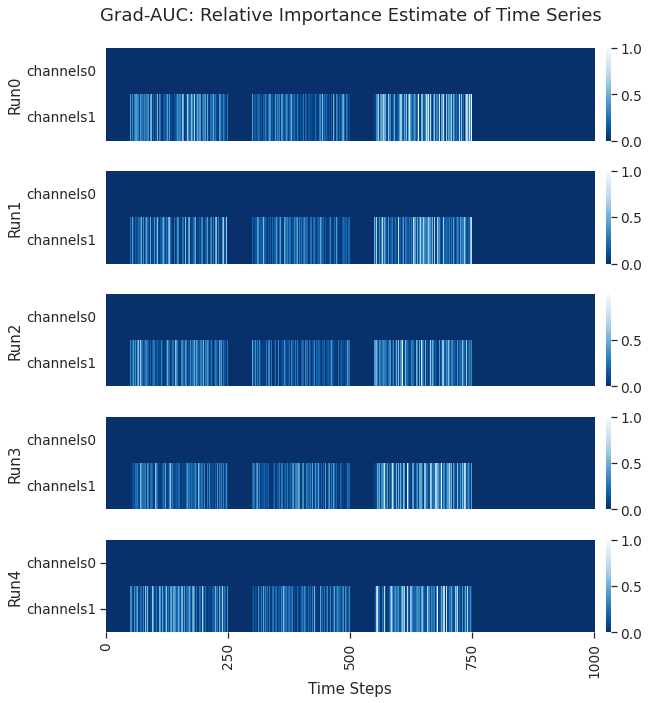

In [30]:
# Relative Importance Estimate of specific gradient profile method
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax= plt.subplots(5,1)
sns.set(font_scale=1.25)
for i in range(runs-1):
    sns.heatmap(
        pd.DataFrame(folder_dictionary[i]),
        xticklabels=False,
        yticklabels=[f"channels{i}" for i in channels],
        annot=False, ax=ax[i],
        cbar_kws={"pad":0.02}, cmap="Blues_r"
    )
    ax[i].set_ylabel(f"Run{i}")
sns.heatmap(
    pd.DataFrame(folder_dictionary[-1]),
    yticklabels=[f"channels{i}" for i in channels],
    annot=False, ax=ax[-1],
    cbar_kws={"pad":0.02}, cmap="Blues_r"
)    

ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999]
)
ax[-1].set_xticklabels([0]+[i for i in range(0,1000,250)][1:]+[1000])
ax[-1].tick_params(left=True, bottom=True)
plt.ylabel(f"Run{runs-1}")
plt.xlabel("Time Steps")
plt.suptitle(model+": Relative Importance Estimate of Time Series")
fig.set_figwidth(10)
fig.set_figheight(10)
plt.tight_layout()

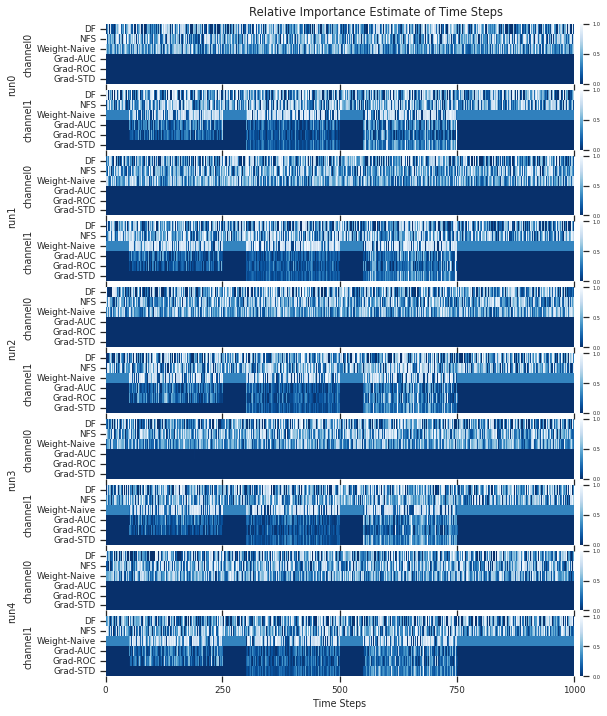

In [191]:
# Overall Relative Importance Estimate of all methods
plot_ws=[
    df_ts_ws[0][:,0],
    nfs_ts_ws[0][:,0],
    iew_ts_ws[0][:,0],
    grad_auc_ts_gs[0][0,:],
    grad_roc_ts_gs[0][0,:],
    grad_std_ts_gs[0][0,:],
    df_ts_ws[0][:,1],
    nfs_ts_ws[0][:,1],
    iew_ts_ws[0][:,1],
    grad_auc_ts_gs[0][1,:],
    grad_roc_ts_gs[0][1,:],
    grad_std_ts_gs[0][1,:],
    df_ts_ws[1][:,0],
    nfs_ts_ws[1][:,0],
    iew_ts_ws[1][:,0],
    grad_auc_ts_gs[1][0,:],
    grad_roc_ts_gs[1][0,:],
    grad_std_ts_gs[1][0,:],
    df_ts_ws[1][:,1],
    nfs_ts_ws[1][:,1],
    iew_ts_ws[1][:,1],
    grad_auc_ts_gs[1][1,:],
    grad_roc_ts_gs[1][1,:],
    grad_std_ts_gs[1][1,:],
    df_ts_ws[2][:,0],
    nfs_ts_ws[2][:,0],
    iew_ts_ws[2][:,0],
    grad_auc_ts_gs[2][0,:],
    grad_roc_ts_gs[2][0,:],
    grad_std_ts_gs[2][0,:],
    df_ts_ws[2][:,1],
    nfs_ts_ws[2][:,1],
    iew_ts_ws[2][:,1],
    grad_auc_ts_gs[2][1,:],
    grad_roc_ts_gs[2][1,:],
    grad_std_ts_gs[2][1,:],
    df_ts_ws[3][:,0],
    nfs_ts_ws[3][:,0],
    iew_ts_ws[3][:,0],
    grad_auc_ts_gs[3][0,:],
    grad_roc_ts_gs[3][0,:],
    grad_std_ts_gs[3][0,:],
    df_ts_ws[3][:,1],
    nfs_ts_ws[3][:,1],
    iew_ts_ws[3][:,1],
    grad_auc_ts_gs[3][1,:],
    grad_roc_ts_gs[3][1,:],
    grad_std_ts_gs[3][1,:],
    df_ts_ws[4][:,0],
    nfs_ts_ws[4][:,0],
    iew_ts_ws[4][:,0],
    grad_auc_ts_gs[4][0,:],
    grad_roc_ts_gs[4][0,:],
    grad_std_ts_gs[4][0,:],
    df_ts_ws[4][:,1],
    nfs_ts_ws[4][:,1],
    iew_ts_ws[4][:,1],
    grad_auc_ts_gs[4][1,:],
    grad_roc_ts_gs[4][1,:],
    grad_std_ts_gs[4][1,:],
]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  [f"channel{i}" for i in range(len(w))] 
y_labels= ["DF", "NFS", "Weight-Naive", "Grad-AUC", "Grad-ROC", "Grad-STD"]
sns.set(font_scale=0.8)
aspect=15

num_plot=10
fig, ax = plt.subplots(num_plot,1)
fig.set_figheight(12)
fig.set_figwidth(10)

start=0
end=start+6
for i in range(num_plot-1):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
        yticklabels=y_labels,
        annot=False, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )

    ax[i].set_xticks(
        [0]+[j-1 for j in range(0,1000,250)][1:]+[999]
    )
    if i % 2==0:
        ax[i].set_ylabel(f"channel0", rotation=90)
    else:
        ax[i].set_ylabel(f"channel1", rotation=90)
        
    ax[i].tick_params(left=True, bottom=True)
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 6
    end += 6

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    yticklabels=y_labels,
    annot=False, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)

ax[-1].set_ylabel("channel1", rotation=90)
ax[-1].tick_params(left=True, bottom=True)

ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)
ax[-1].tick_params(axis='x', labelrotation=0)

ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999]
)
ax[-1].set_xticklabels([0]+[i for i in range(0,1000,250)][1:]+[1000])
ax[-1].set_xlabel("Time Steps")
if model=="Weight":
    model="Weight-Naive"
fig.suptitle("Relative Importance Estimate of Time Steps",y=0.9)

fig.subplots_adjust(wspace=0, hspace=0.1)
# plt.tight_layout()

for i in range(5):
    ax[i*2].text(-210,7,f"run{i}", rotation=90)

## Dataset 1 

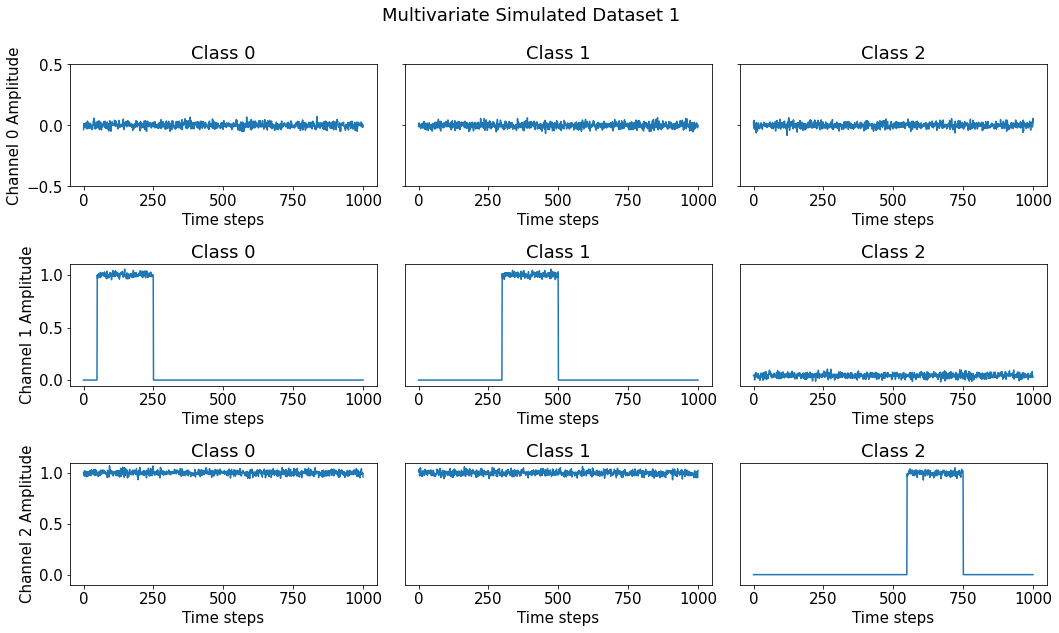

In [6]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rc("font", size=15)

default_path= "./experiments/multisimul_study/exp_log0/"
option=2
X,y= pickle.load(open(f"{default_path}dataset{option}.pkl", "rb"))

fig, axes= plt.subplots(3,3)
fig.set_figwidth(15)
fig.set_figheight(9)

indices= np.unique(y, return_index=True)[1]
axis= axes[0][0]
index=indices[0]
class_idx=0

axis.plot(X[index][:,0])
axis.set_xlabel("Time steps") 
axis.set_title(f"Class {class_idx}") 
axis.set_ylim(-0.5,0.5)
axis.set_yticks([-0.5,0.,0.5])
axis.set_ylabel("Channel 0 Amplitude") 
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[1][0]
index=indices[0]
class_idx=0
axis.plot(X[index][:,1])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_ylabel("Channel 1 Amplitude")
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[2][0]
index=indices[0]
class_idx=0
axis.plot(X[index][:,2])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_ylim(-0.1,1.1)
axis.set_yticks([0.,0.5,1.0])
axis.set_ylabel("Channel 2 Amplitude")
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[0][1]
index=indices[1]
class_idx=1

axis.plot(X[index][:,0])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_yticks([])
axis.set_yticks([-0.5,0.,0.5])
axis.set_yticklabels([])
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[1][1]
index=indices[1]
class_idx=1

axis.plot(X[index][:,1])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_yticks([])
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[2][1]
index=indices[1]
class_idx=1

axis.plot(X[index][:,2])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_ylim(-0.1,1.1)
axis.set_yticks([])
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[0][2]
index=indices[2]
class_idx=2

axis.plot(X[index][:,0])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_yticks([-0.5,0.,0.5])
axis.set_yticklabels([])
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[1][2]
index=indices[2]
class_idx=2

axis.plot(X[index][:,1])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_yticks([])
axis.set_ylim(-0.1,1.1)
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

axis= axes[2][2]
index=indices[2]
class_idx=2

axis.plot(X[index][:,2])
axis.set_xlabel("Time steps")
axis.set_title(f"Class {class_idx}")
axis.set_ylim(-0.1,1.1)
axis.set_yticks([])
axis.set_xticks([0,249,499,749,999])
axis.set_xticklabels([0,250,500,750,1000])

plt.suptitle(f"Multivariate Simulated Dataset {option-1}")
plt.tight_layout()


## Weight Profile: Averages

In [10]:
import pickle
from sklearn.preprocessing import MinMaxScaler
ws=[]

original_dict={"DF":"DF", "NFS":"NFS",
               "Weight":"Weight"} #folder: model
model="NFS"
epoch= 50
option=2
runs=5

for model in original_dict.keys():
    ws=[]

    for folder in range(runs):
        scaler= MinMaxScaler()
        w= pickle.load( open(f"./experiments/multisimul_study/exp_log{folder}/{original_dict[model]}/multiseriessimul_study{option}-{model}-w-{epoch}.pkl", "rb") )
        w= scaler.fit_transform(w.reshape(-1,1)).reshape(-1)
        ws.append(w)

    if model=="Weight":
        iew_ws=ws.copy()
    elif model=="DF":
        df_ws=ws.copy()
    elif model=="NFS":
        nfs_ws=ws.copy()


Text(0.5, 1.0, 'Weight-Naive: Relative Importance Estimate of Channels')

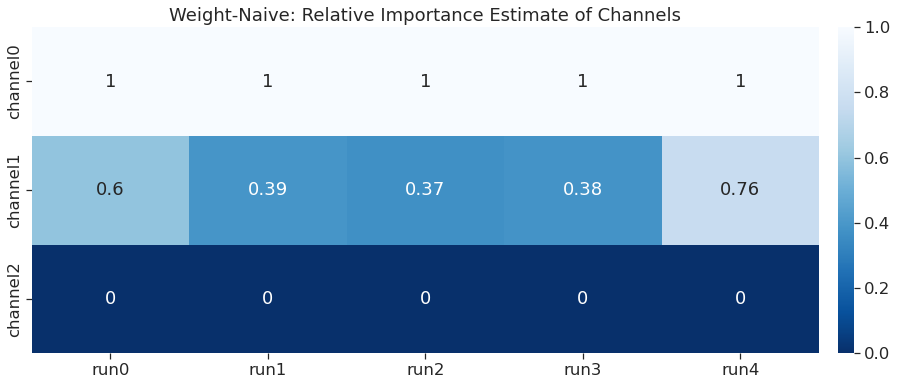

In [69]:
#Relative Importance Estimate of a specific Weight profile method using Element wise Multiplication
import seaborn as sns
import pandas as pd
x_labels=  [f"channel{i}" for i in range(len(w))] 
y_labels= [f"run{i}" for i in range(runs)]
plt.figure(figsize=(17,6))
sns.set(font_scale=1.5)
ax= sns.heatmap(pd.DataFrame(ws).transpose(), 
            xticklabels=y_labels, 
            yticklabels=x_labels, cmap="Blues_r",
            annot=True,cbar_kws={"pad":0.02})

ax.tick_params(left=True, bottom=True)
if model=="Weight":
    model="Weight-Naive"
plt.title(model+": Relative Importance Estimate of Channels")

In [11]:
ws=[]
original_dict={"DF":"DF", "NFS":"NFS",
               "Weight":"Weight"} #folder: model
model="DF"
epoch= 50
option=2
runs=5
for model in original_dict.keys():
    ws=[]
    for folder in range(runs):
        scaler= MinMaxScaler()
        w= pickle.load( open(f"./experiments/multisimul_study/exp_log{folder}/{original_dict[model]}/multivarsimul_study{option}-{model}-w-{epoch}.pkl", "rb") )
        w= scaler.fit_transform(np.array(w))
        ws.append(w)

    if model=="Weight":
        iew_ts_ws=ws.copy()
    elif model=="DF":
        df_ts_ws=ws.copy()
    elif model=="NFS":
        nfs_ts_ws=ws.copy()

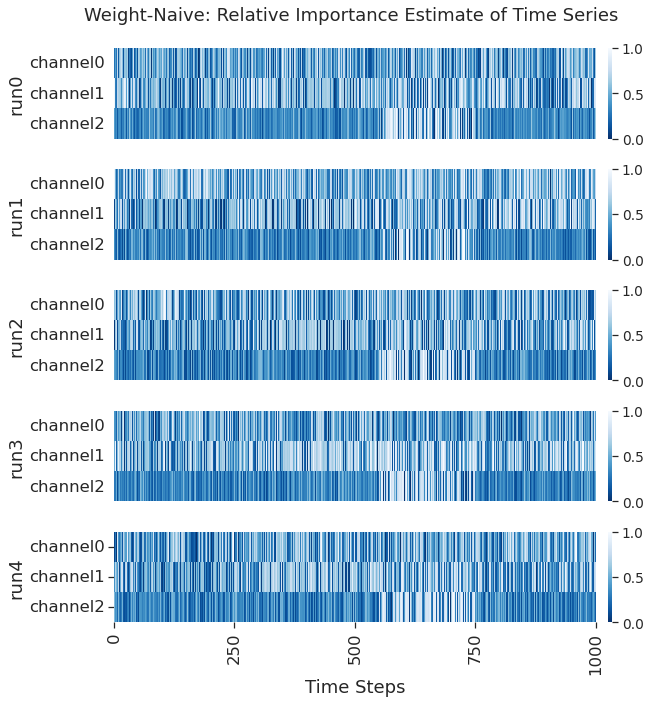

In [71]:
#Relative Importance Estimate of a specific Weight profile method

import seaborn as sns
import pandas as pd

fig, ax= plt.subplots(5,1)
sns.set(font_scale=1.25)
for i in range(runs-1):
    sns.heatmap(
        pd.DataFrame(ws[i]).transpose(),
        xticklabels=False, 
        yticklabels=[f"channel{c}" for c in range(w.shape[1])],
        annot=False, ax=ax[i], cbar_kws={"pad":0.02}, cmap="Blues_r"
    )
    ax[i].set_ylabel(f"run{i}")
    
sns.heatmap(
    pd.DataFrame(ws[-1]).transpose(), 
    xticklabels="auto", 
    yticklabels=[f"channel{c}" for c in range(w.shape[1])],
    annot=False, ax=ax[-1], cbar_kws={"pad":0.02}, cmap="Blues_r"
)    


ax[-1].tick_params(left=True, bottom=True)
ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999]
)
ax[-1].set_xticklabels([0]+[i for i in range(0,1000,250)][1:]+[1000])
plt.ylabel(f"run{runs-1}")
plt.xlabel("Time Steps")
if model=="Weight":
    model="Weight-Naive"
plt.suptitle(model+": Relative Importance Estimate of Time Series")
fig.set_figwidth(10)
fig.set_figheight(10)
plt.tight_layout()

## Grad Profile: Averages

In [12]:
from utilities.subset_func import return_epoch_stat
import pickle
from sklearn.preprocessing import MinMaxScaler

channels= [0,1,2]
epochs=50
option=2
model="Grad-AUC"
folder_dictionary=[]
runs=5
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multiseriessimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_auc_gs= pd.DataFrame(folder_dictionary).to_numpy()

[0.58231287 0.77641716 0.97641717 0.9882086 ]
[0.58355176 0.77806901 0.97806901 0.9890345 ]
[0.49707664 0.66276885 0.86276884 0.9313844 ]
[0.41671064 0.55561418 0.75561419 0.87780713]
[0.47062456 0.62749941 0.8274994  0.91374968]


In [13]:
from utilities.subset_func import return_epoch_stat
import pickle

channels= [0,1,2]
epochs=50
option=2
model="Grad-ROC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multiseriessimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_roc_gs= pd.DataFrame(folder_dictionary).to_numpy()

[0.41552746 0.55403661 0.75403661 0.8770183 ]
[0.42526477 0.56701969 0.76701969 0.88350986]
[0.42655986 0.56874648 0.76874648 0.88437324]
[0.41227072 0.5496943  0.7496943  0.87484715]
[0.39832351 0.53109801 0.73109802 0.86554903]


In [14]:
from utilities.subset_func import return_epoch_stat
import pickle

channels= [0,1,2]# ['Temperature',"Humidity","Light","CO2", "HumidityRatio"]
epochs=50
option=2
model="Grad-STD"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multiseriessimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(channels))
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(dictionary)
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_std_gs= pd.DataFrame(folder_dictionary).to_numpy()

[0.1614765  0.21530199 0.415302   0.70765102]
[0.19196117 0.25594823 0.45594823 0.72797411]
[0.18248236 0.24330981 0.44330981 0.72165489]
[0.20600231 0.27466974 0.47466973 0.73733483]
[0.15832067 0.21109422 0.41109423 0.70554714]


Text(0.5, 1.0, 'Grad-STD: Relative Importance Estimate of Channels')

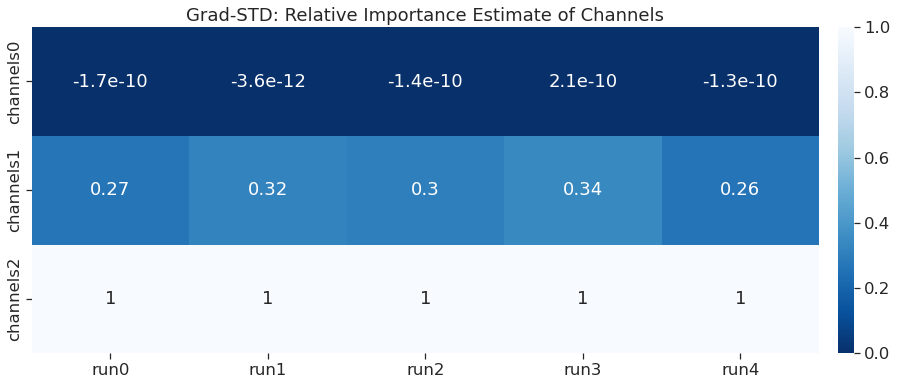

In [62]:
# Relative Importance Estimate of a specific Gradient profile method using Element wise Multiplication
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
plt.figure(figsize=(17,6))
ax= sns.heatmap(
    pd.DataFrame(folder_dictionary).transpose(), 
    yticklabels=[f"channels{i}" for i in channels], 
    xticklabels=[f"run{i}" for i in range(runs)], 
    annot=True, cbar_kws={"pad":0.02}, cmap="Blues_r")
ax.tick_params(left=True, bottom=True)
plt.title(model+": Relative Importance Estimate of Channels")

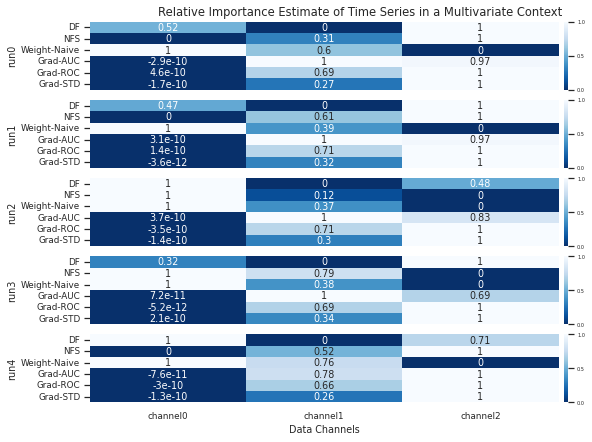

In [15]:
# Overall relative Importance Estimate of all methods using Element wise Multiplication
plot_ws=[
    df_ws[0],
    nfs_ws[0],
    iew_ws[0],
    grad_auc_gs[0],
    grad_roc_gs[0],
    grad_std_gs[0],
    df_ws[1],
    nfs_ws[1],
    iew_ws[1],
    grad_auc_gs[1],
    grad_roc_gs[1],
    grad_std_gs[1],
    df_ws[2],
    nfs_ws[2],
    iew_ws[2],
    grad_auc_gs[2],
    grad_roc_gs[2],
    grad_std_gs[2],
    df_ws[3],
    nfs_ws[3],
    iew_ws[3],
    grad_auc_gs[3],
    grad_roc_gs[3],
    grad_std_gs[3],
    df_ws[4],
    nfs_ws[4],
    iew_ws[4],
    grad_auc_gs[4],
    grad_roc_gs[4],
    grad_std_gs[4],
]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  ["channel0","channel1","channel2"]
y_labels= ["DF", "NFS", "Weight-Naive", "Grad-AUC", "Grad-ROC", "Grad-STD"]#[f"run{i}" for i in range(runs)]
sns.set(font_scale=0.8)
aspect=15

fig, ax = plt.subplots(5,1)
fig.set_figheight(7)
fig.set_figwidth(10)

start=0
end=start+6
for i in range(4):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
        yticklabels=y_labels,
        annot=True, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )

    ax[i].set_xticks([])
    ax[i].set_ylabel(f"run{i}")
    ax[i].tick_params(left=True) 
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 6
    end += 6

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    xticklabels=x_labels, 
    yticklabels=y_labels, 
    annot=True, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)

ax[-1].set_ylabel("run4")
ax[-1].tick_params(left=True) 
ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)

ax[-1].set_xlabel("Data Channels")
if model=="Weight":
    model="Weight-Naive"
fig.suptitle(
    "Relative Importance Estimate of Time Series in a Multivariate Context",
    y=0.91
)

fig.subplots_adjust(wspace=0, hspace=0.15)
# plt.tight_layout()

In [206]:
from utilities.subset_func import return_epoch_stat
import pickle


timesteps= [i for i in range(1000)]
epochs=50
option=2
if option==2:
    channels= [i for i in range(3)]
elif option==1:
    channels= [i for i in range(2)]

model="Grad-AUC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multivarsimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(timesteps), len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, :, idx]), axis=0)
        scaler.partial_fit(dictionary[name].reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform(dictionary[key].reshape(-1,1)).reshape(-1)
        
    folder_dictionary.append(pd.DataFrame(dictionary).transpose())
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
    
grad_auc_ts_gs=[]
for i in range(runs):
    grad_auc_ts_gs.append(pd.DataFrame(folder_dictionary[i]).to_numpy())

[0.00041286 0.00078404 0.01481782 0.06393931]
[0.00040511 0.00072183 0.01551514 0.06643916]
[0.00041358 0.00078133 0.01617369 0.0667574 ]
[0.00046553 0.00086391 0.02057518 0.07889391]
[0.00038809 0.00071375 0.01374295 0.05853739]


In [207]:
from utilities.subset_func import return_epoch_stat
import pickle

channels= [i for i in range(3)]
timesteps= [i for i in range(1000)]
epochs=50
option=2
model="Grad-ROC"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multivarsimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(timesteps), len(channels))
    
    scaler=MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:,:, i], 1 )
        rolled[0]=0.
        diff= epoch[:,:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff), axis=0)
        scaler.partial_fit(dictionary[channels[i]].reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform(dictionary[key].reshape(-1,1)).reshape(-1)
        
        
    folder_dictionary.append(pd.DataFrame(dictionary).transpose())
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_roc_ts_gs=[]
for i in range(runs):
    grad_roc_ts_gs.append(pd.DataFrame(folder_dictionary[i]).to_numpy())

[0.00048627 0.00076062 0.0130726  0.05810313]
[0.00054827 0.00086257 0.01643153 0.08185189]
[0.00048431 0.00076489 0.01464633 0.06718342]
[0.00053888 0.00089524 0.01824249 0.08104695]
[0.00050364 0.0008322  0.01348741 0.0628891 ]


In [208]:
from utilities.subset_func import return_epoch_stat
import pickle

channels= [i for i in range(3)]
timesteps= [i for i in range(1000)]
epochs=50
option=2
model="Grad-STD"
folder_dictionary=[]
for folder in range(runs):
    grads= pickle.load(open(f"./experiments/multisimul_study/exp_log{folder}/Grad/list/multivarsimul_study{option}-Grad-list-{epochs}.pkl","rb"))
    grad_all= np.array(grads).reshape(epochs,-1,len(timesteps), len(channels))
    
    scaler=MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, :,idx]), axis=0)
        scaler.partial_fit(dictionary[name].reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform(dictionary[key].reshape(-1,1)).reshape(-1)
    folder_dictionary.append(pd.DataFrame(dictionary).transpose())
    print(np.percentile(list(dictionary.values()), [30,40,60,80]))
grad_std_ts_gs=[]
for i in range(runs):
    grad_std_ts_gs.append(pd.DataFrame(folder_dictionary[i]).to_numpy())

[0.00041236 0.00062356 0.00359415 0.07988865]
[0.00039075 0.00058054 0.0040418  0.087753  ]
[0.00042456 0.0006292  0.0047778  0.08131632]
[0.00045062 0.00066474 0.00450188 0.09304954]
[0.00039724 0.00059114 0.00308312 0.09264097]


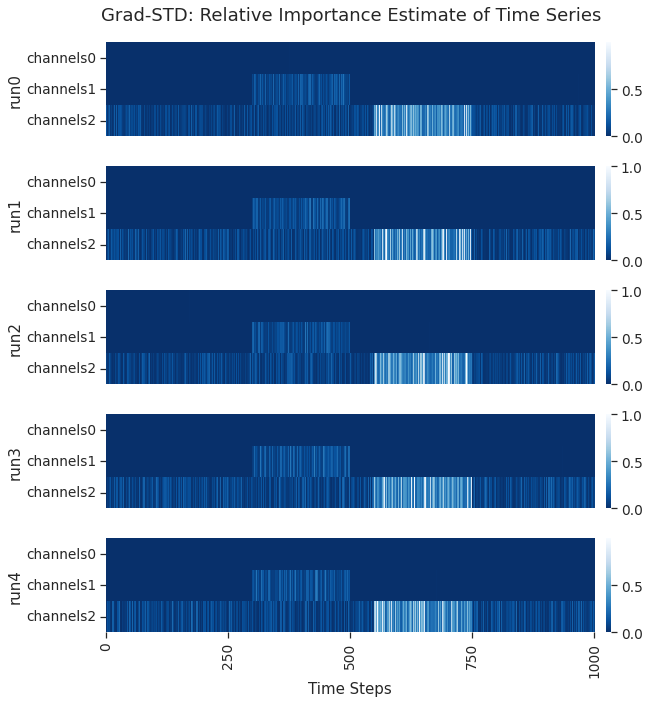

In [42]:
# Relative Importance Estimate using a specific Gradient profile method
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax= plt.subplots(5,1)
sns.set(font_scale=1.25)
for i in range(runs-1):
    sns.heatmap(
        pd.DataFrame(folder_dictionary[i]),
        xticklabels=False, 
        yticklabels=[f"channels{i}" for i in channels],
        annot=False, ax=ax[i], cbar_kws={"pad":0.02}, cmap="Blues_r")
    ax[i].set_ylabel(f"run{i}")
    ax[i].tick_params(left=True, bottom=True)
sns.heatmap(
    pd.DataFrame(folder_dictionary[-1]), 
    xticklabels="auto",
    yticklabels=[f"channels{i}" for i in channels],
    annot=False, ax=ax[-1], cbar_kws={"pad":0.02}, cmap="Blues_r"
)    

ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999]
)
ax[-1].set_xticklabels([0]+[i for i in range(0,1000,250)][1:]+[1000])
ax[-1].tick_params(left=True, bottom=True)

plt.ylabel(f"run{runs-1}")
plt.xlabel("Time Steps")
plt.suptitle(model+": Relative Importance Estimate of Time Series")
fig.set_figwidth(10)
fig.set_figheight(10)
plt.tight_layout()

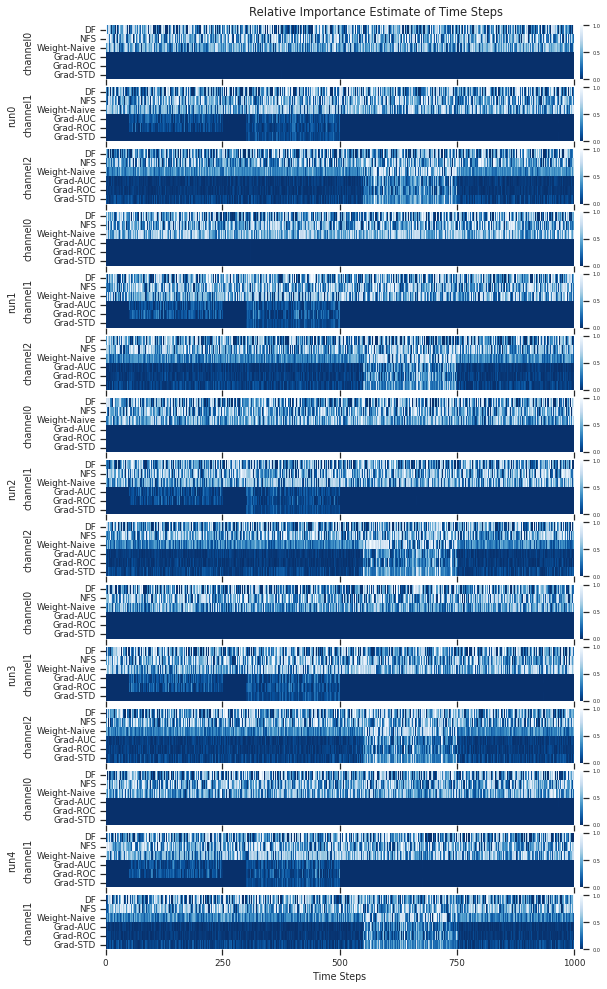

In [216]:
# Overall relative Importance Estimate using all methods
plot_ws=[
    df_ts_ws[0][:,0],
    nfs_ts_ws[0][:,0],
    iew_ts_ws[0][:,0],
    grad_auc_ts_gs[0][0,:],
    grad_roc_ts_gs[0][0,:],
    grad_std_ts_gs[0][0,:],
    df_ts_ws[0][:,1],
    nfs_ts_ws[0][:,1],
    iew_ts_ws[0][:,1],
    grad_auc_ts_gs[0][1,:],
    grad_roc_ts_gs[0][1,:],
    grad_std_ts_gs[0][1,:],
    df_ts_ws[0][:,2],
    nfs_ts_ws[0][:,2],
    iew_ts_ws[0][:,2],
    grad_auc_ts_gs[0][2,:],
    grad_roc_ts_gs[0][2,:],
    grad_std_ts_gs[0][2,:],
    df_ts_ws[1][:,0],
    nfs_ts_ws[1][:,0],
    iew_ts_ws[1][:,0],
    grad_auc_ts_gs[1][0,:],
    grad_roc_ts_gs[1][0,:],
    grad_std_ts_gs[1][0,:],
    df_ts_ws[1][:,1],
    nfs_ts_ws[1][:,1],
    iew_ts_ws[1][:,1],
    grad_auc_ts_gs[1][1,:],
    grad_roc_ts_gs[1][1,:],
    grad_std_ts_gs[1][1,:],
    df_ts_ws[1][:,2],
    nfs_ts_ws[1][:,2],
    iew_ts_ws[1][:,2],
    grad_auc_ts_gs[1][2,:],
    grad_roc_ts_gs[1][2,:],
    grad_std_ts_gs[1][2,:],
    df_ts_ws[2][:,0],
    nfs_ts_ws[2][:,0],
    iew_ts_ws[2][:,0],
    grad_auc_ts_gs[2][0,:],
    grad_roc_ts_gs[2][0,:],
    grad_std_ts_gs[2][0,:],
    df_ts_ws[2][:,1],
    nfs_ts_ws[2][:,1],
    iew_ts_ws[2][:,1],
    grad_auc_ts_gs[2][1,:],
    grad_roc_ts_gs[2][1,:],
    grad_std_ts_gs[2][1,:],
    df_ts_ws[2][:,2],
    nfs_ts_ws[2][:,2],
    iew_ts_ws[2][:,2],
    grad_auc_ts_gs[2][2,:],
    grad_roc_ts_gs[2][2,:],
    grad_std_ts_gs[2][2,:],
    df_ts_ws[3][:,0],
    nfs_ts_ws[3][:,0],
    iew_ts_ws[3][:,0],
    grad_auc_ts_gs[3][0,:],
    grad_roc_ts_gs[3][0,:],
    grad_std_ts_gs[3][0,:],
    df_ts_ws[3][:,1],
    nfs_ts_ws[3][:,1],
    iew_ts_ws[3][:,1],
    grad_auc_ts_gs[3][1,:],
    grad_roc_ts_gs[3][1,:],
    grad_std_ts_gs[3][1,:],
    df_ts_ws[3][:,2],
    nfs_ts_ws[3][:,2],
    iew_ts_ws[3][:,2],
    grad_auc_ts_gs[3][2,:],
    grad_roc_ts_gs[3][2,:],
    grad_std_ts_gs[3][2,:],
    df_ts_ws[4][:,0],
    nfs_ts_ws[4][:,0],
    iew_ts_ws[4][:,0],
    grad_auc_ts_gs[4][0,:],
    grad_roc_ts_gs[4][0,:],
    grad_std_ts_gs[4][0,:],
    df_ts_ws[4][:,1],
    nfs_ts_ws[4][:,1],
    iew_ts_ws[4][:,1],
    grad_auc_ts_gs[4][1,:],
    grad_roc_ts_gs[4][1,:],
    grad_std_ts_gs[4][1,:],
    df_ts_ws[4][:,2],
    nfs_ts_ws[4][:,2],
    iew_ts_ws[4][:,2],
    grad_auc_ts_gs[4][2,:],
    grad_roc_ts_gs[4][2,:],
    grad_std_ts_gs[4][2,:],
]

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
x_labels=  ["channel0","channel1","channel2"]
y_labels= ["DF", "NFS", "Weight-Naive", "Grad-AUC", "Grad-ROC", "Grad-STD"]
sns.set(font_scale=0.8)
aspect=15

num_plot=15
fig, ax = plt.subplots(num_plot,1)
fig.set_figheight(17)
fig.set_figwidth(10)

start=0
end=start+6
count=0
for i in range(num_plot-1):

    sns.heatmap(
        pd.DataFrame(plot_ws[start:end]),
        xticklabels=False, 
        yticklabels=y_labels,
        annot=False, cmap="Blues_r", ax=ax[i],cbar=True,
        cbar_kws={"pad":0.01,"ticks":[0,0.5,1.0]}
    )

    ax[i].set_xticks(
        [0]+[j-1 for j in range(0,1000,250)][1:]+[999],
    )
    if count==0:
        ax[i].set_ylabel(f"channel0", rotation=90)
        count += 1
    elif count ==1:
        ax[i].set_ylabel(f"channel1", rotation=90)
        count += 1
    elif count ==2:
        ax[i].set_ylabel(f"channel2", rotation=90)
        count =0
        
    ax[i].tick_params(left=True, bottom=True)
    ax[i].collections[0].colorbar.ax.tick_params(labelsize=5)
    ax[i].tick_params(axis='y', labelrotation=0)

    start += 6
    end += 6

sns.heatmap(
    pd.DataFrame(plot_ws[start:]),
    yticklabels=y_labels,
    annot=False, cmap="Blues_r",ax=ax[-1],cbar=True, 
    cbar_kws={"pad":0.01, "ticks":[0,0.5,1.0]}
)

ax[-1].set_ylabel("channel1", rotation=90)
ax[-1].tick_params(left=True, bottom=True)
ax[-1].collections[0].colorbar.ax.tick_params(labelsize=5)
ax[-1].tick_params(axis='y', labelrotation=0)
ax[-1].tick_params(axis='x', labelrotation=0)

ax[-1].set_xticks(
    [0]+[i-1 for i in range(0,1000,250)][1:]+[999]
)
ax[-1].set_xticklabels([0]+[i for i in range(0,1000,250)][1:]+[1000])
ax[-1].set_xlabel("Time Steps")
if model=="Weight":
    model="Weight-Naive"
fig.suptitle("Relative Importance Estimate of Time Steps",y=0.895)

fig.subplots_adjust(wspace=0, hspace=0.15)
# plt.tight_layout()

for i in range(5):
    ax[i*3].text(-210,11,f"run{i}", rotation=90)